In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
df = pd.read_csv('titanic_clean_limited.csv')
df.shape

(1310, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass            1309 non-null   float64
 1   survived          1309 non-null   float64
 2   name              1309 non-null   object 
 3   sex               1309 non-null   object 
 4   age               1310 non-null   float64
 5   sibsp             1309 non-null   float64
 6   parch             1309 non-null   float64
 7   ticket            1309 non-null   object 
 8   fare              1308 non-null   float64
 9   cabin             295 non-null    object 
 10  embarked          1310 non-null   object 
 11  home.dest         745 non-null    object 
 12  has_cabin_number  1310 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 133.2+ KB


In [6]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [9]:
empty_cols = df.isnull().sum()
empty_cols

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
home.dest            565
has_cabin_number       0
dtype: int64

In [18]:
try:
    df = df.drop(index=1309)
    df
except:
    df
print(df.shape)

(1309, 13)


In [19]:
df[df['fare'].isnull()]
print(df.shape)
df = df.drop(index=1225)
print(df.shape)

(1309, 13)
(1308, 13)


In [20]:
df['sex_num'] = df['sex'].factorize()[0]
df['embarked_num'] = df['embarked'].factorize()[0]

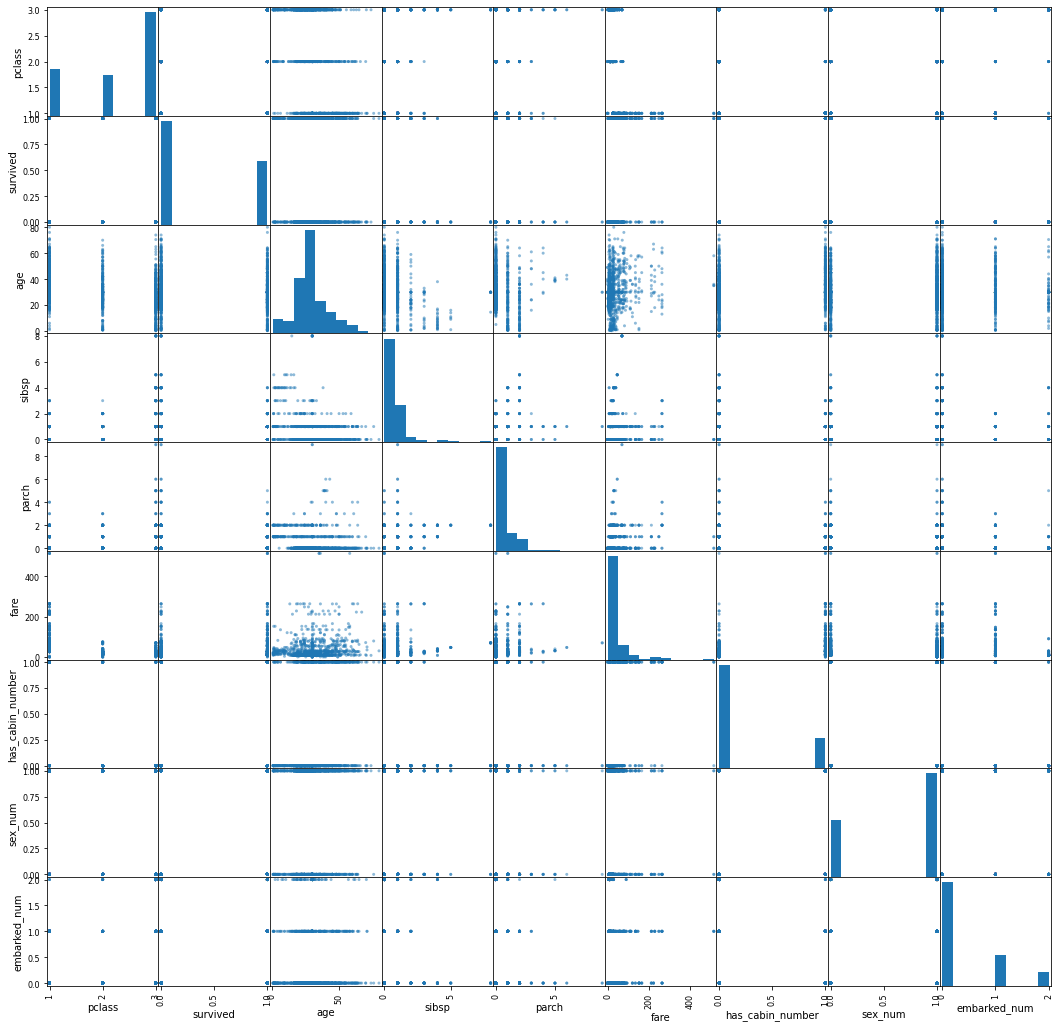

In [21]:
pd.plotting.scatter_matrix(df, figsize=(18,18));

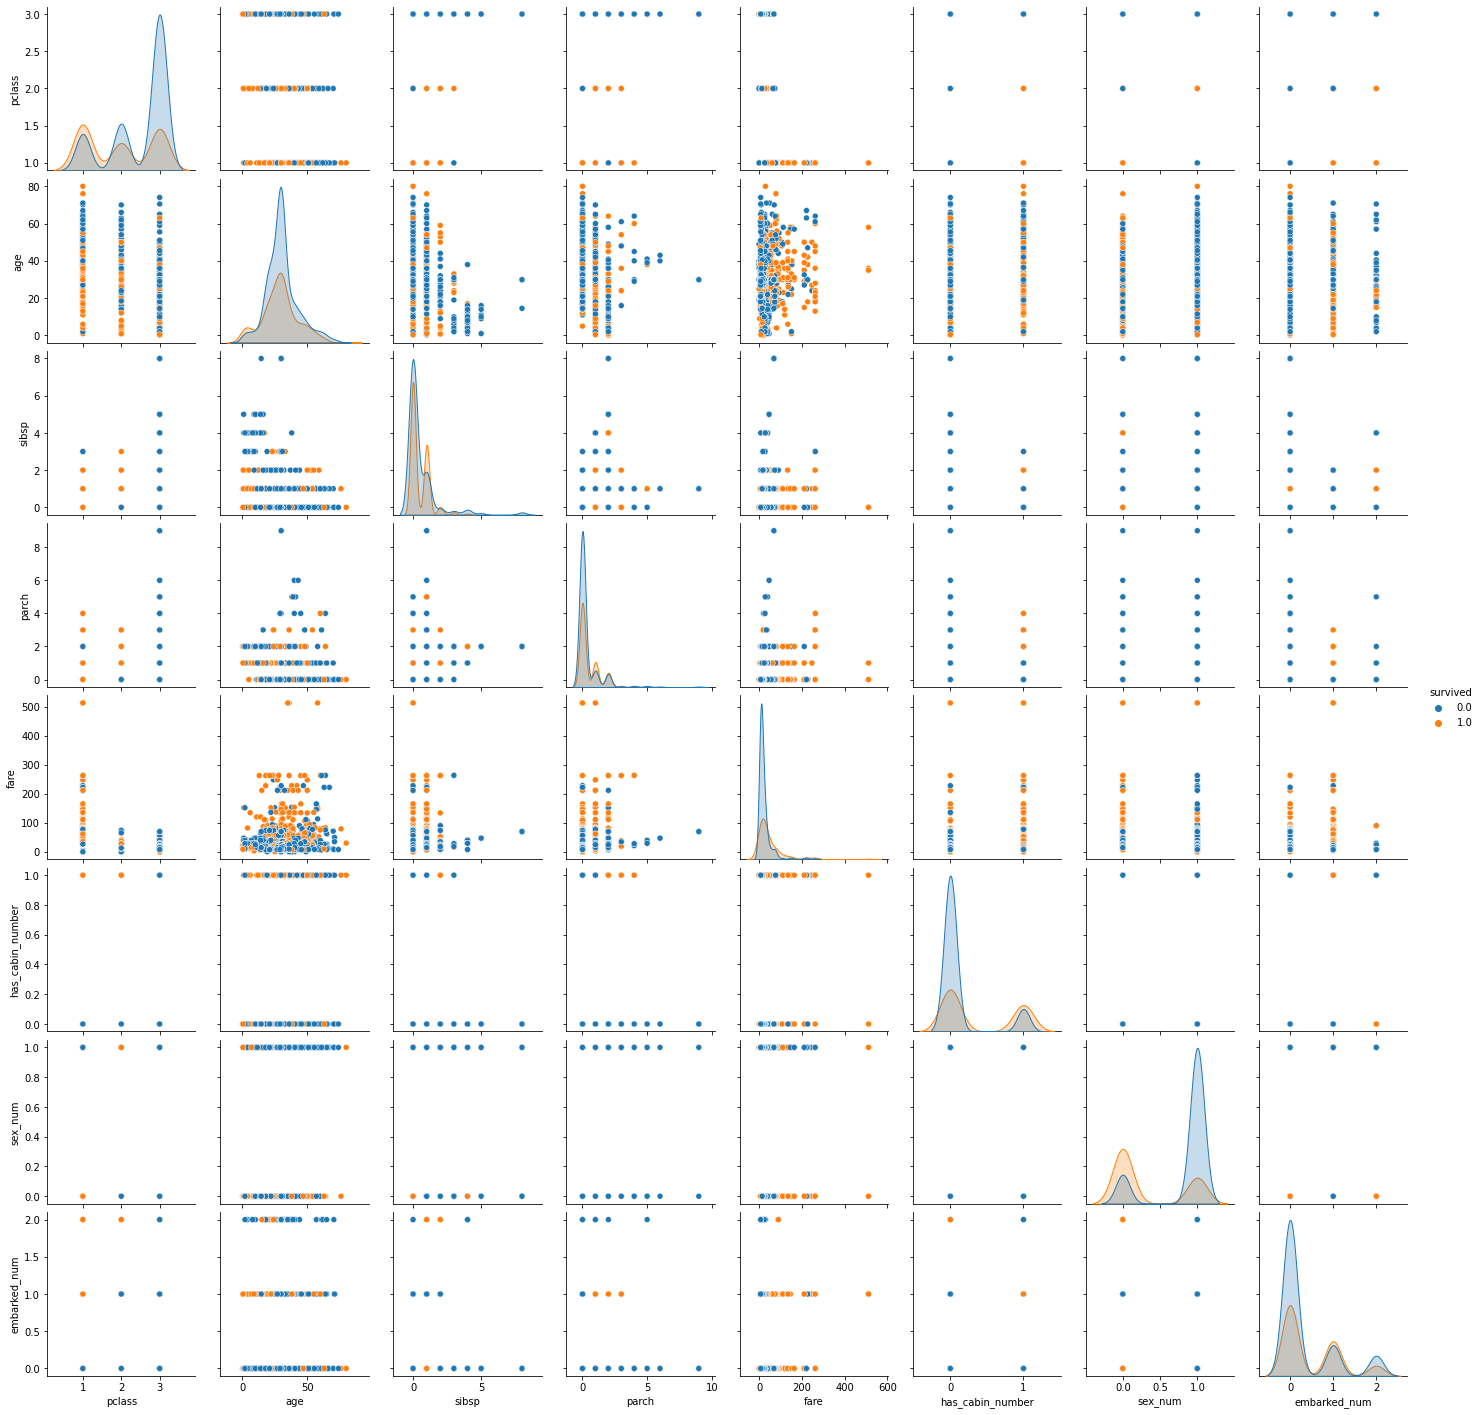

In [22]:
sns.pairplot(df, hue = "survived", kind = "scatter");

In [31]:
#replace null values to mean
df['fare'] = df['fare'].fillna(value=df['fare'].mean())
df['home.dest']=df['home.dest'].fillna(value='unknown')

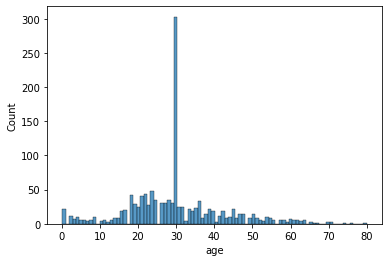

In [34]:
sns.histplot(df['age'], bins=90)

In [35]:
df['survived'].value_counts()

0.0    808
1.0    500
Name: survived, dtype: int64